In [1]:
'''
Implement Naïve Bayes theorem to classify the English text 
Priyadharshini G
•
Mar 26
100 points
It should include
1.Bag of words
2.Tf-IDF
3.Glove
Execute Naive Bayes after applying each of these preprocessing and display the classification metrics.

Observation:
Aim
Explanation of all the preprocessing with its adv and disadv
Program
Output 
Result
'''

'\nImplement Naïve Bayes theorem to classify the English text \nPriyadharshini G\n•\nMar 26\n100 points\nIt should include\n1.Bag of words\n2.Tf-IDF\n3.Glove\nExecute Naive Bayes after applying each of these preprocessing and display the classification metrics.\n\nObservation:\nAim\nExplanation of all the preprocessing with its adv and disadv\nProgram\nOutput \nResult\n'

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Step 1: Load the dataset
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

# Step 2: Preprocess the text data
vectorizers = [
    ('Bag of Words', CountVectorizer()),
    ('TF-IDF', TfidfVectorizer()),
]

for name, vectorizer in vectorizers:
    X_train = vectorizer.fit_transform(newsgroups_train.data)
    X_test = vectorizer.transform(newsgroups_test.data)
    y_train = newsgroups_train.target
    y_test = newsgroups_test.target

    # Step 3: Train Naïve Bayes classifier
    clf = MultinomialNB()
    clf.fit(X_train, y_train)

    # Step 4: Evaluate classifier
    print(f"Classification Report for {name}:")
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=newsgroups_test.target_names))


Classification Report for Bag of Words:
                        precision    recall  f1-score   support

           alt.atheism       0.92      0.90      0.91       319
         comp.graphics       0.95      0.95      0.95       389
               sci.med       0.96      0.91      0.93       396
soc.religion.christian       0.91      0.97      0.94       398

              accuracy                           0.93      1502
             macro avg       0.93      0.93      0.93      1502
          weighted avg       0.93      0.93      0.93      1502

Classification Report for TF-IDF:
                        precision    recall  f1-score   support

           alt.atheism       0.97      0.60      0.74       319
         comp.graphics       0.96      0.89      0.92       389
               sci.med       0.97      0.81      0.88       396
soc.religion.christian       0.65      0.99      0.78       398

              accuracy                           0.83      1502
             macro avg   

Classification Report for Bag of Words:
                        precision    recall  f1-score   support

           alt.atheism       0.92      0.90      0.91       319
         comp.graphics       0.95      0.95      0.95       389
               sci.med       0.96      0.91      0.93       396
soc.religion.christian       0.91      0.97      0.94       398

              accuracy                           0.93      1502
             macro avg       0.93      0.93      0.93      1502
          weighted avg       0.93      0.93      0.93      1502



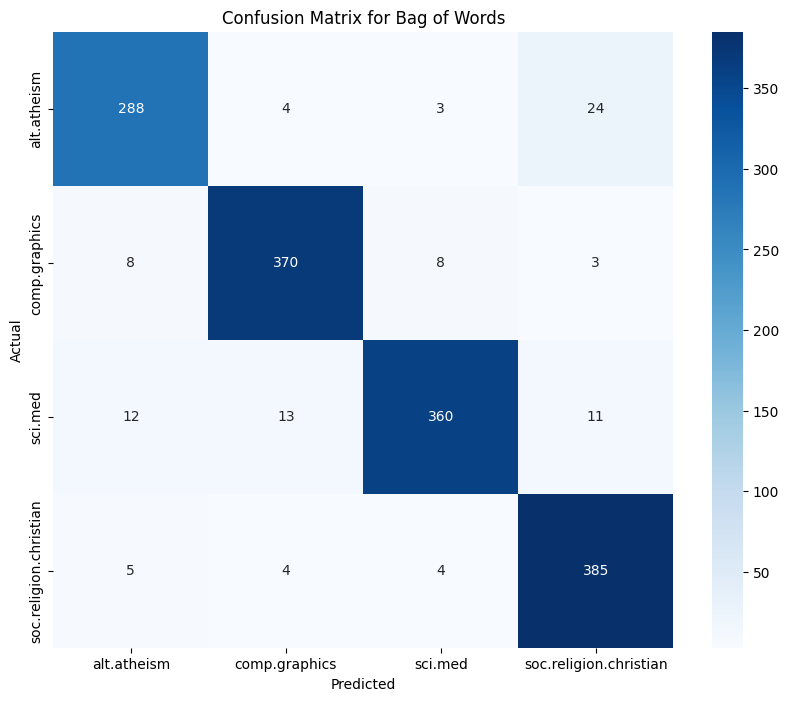

Classification Report for TF-IDF:
                        precision    recall  f1-score   support

           alt.atheism       0.97      0.60      0.74       319
         comp.graphics       0.96      0.89      0.92       389
               sci.med       0.97      0.81      0.88       396
soc.religion.christian       0.65      0.99      0.78       398

              accuracy                           0.83      1502
             macro avg       0.89      0.82      0.83      1502
          weighted avg       0.88      0.83      0.84      1502



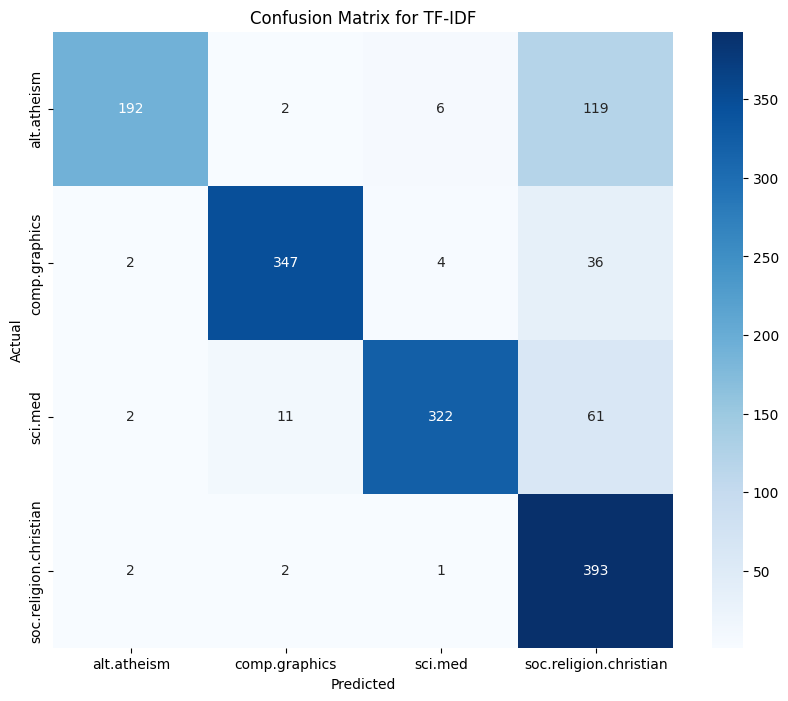

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

# Step 2: Preprocess the text data
vectorizers = [
    ('Bag of Words', CountVectorizer()),
    ('TF-IDF', TfidfVectorizer()),
]

for name, vectorizer in vectorizers:
    X_train = vectorizer.fit_transform(newsgroups_train.data)
    X_test = vectorizer.transform(newsgroups_test.data)
    y_train = newsgroups_train.target
    y_test = newsgroups_test.target

    # Step 3: Train Naïve Bayes classifier
    clf = MultinomialNB()
    clf.fit(X_train, y_train)

    # Step 4: Evaluate classifier
    print(f"Classification Report for {name}:")
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=newsgroups_test.target_names))

    # Step 5: Create confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred)

    # Step 6: Visualize confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=newsgroups_test.target_names, yticklabels=newsgroups_test.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
